In [13]:
!pwd

/Users/JenD/W210/CapstoneProject/bittah-ninja/eval


In [25]:
import pandas as pd
preds = pd.read_csv('fake.csv',header=0,index_col=0)

In [26]:
preds.head()

,predix
video-UID,
12,0
23,0
43,0
50,0
62,0


In [ ]:
preds['0'].value_counts()

In [14]:
truth = pd.read_csv('../first_1K_labeled.csv',header=0,index_col=0)

In [15]:
truth.head()

,clip_title,labeler,class
video-UID,,,
12,Australian_flash_mob_dance_slice125.mp4,Lance,0
23,Australian_flash_mob_dance_slice175.mp4,Jen,0
43,Australian_flash_mob_dance_slice265.mp4,Lance,0
50,Australian_flash_mob_dance_slice30.mp4,Jen,0
62,Australian_flash_mob_dance_slice85.mp4,Ahsen,0


In [17]:
type(truth['class'])

pandas.core.series.Series

In [30]:
truth['class'][-10:]

video-UID
5264    0
5265    1
5267    1
5269    0
5270    1
5271    0
5281    0
5282    0
5285    0
5287    0
Name: class, dtype: int64

In [31]:
preds['predix'][-10:]

video-UID
5264    0
5265    1
5267    1
5269    0
5270    1
5271    0
5281    0
5282    0
5285    0
5287    0
Name: predix, dtype: int64

In [32]:
import sklearn

In [33]:
from sklearn.metrics import confusion_matrix

In [39]:
labels = sorted(truth['class'].value_counts().index)

In [40]:
confusion_matrix(y_true=truth['class'],y_pred=preds['predix'], labels=labels)

array([[ 31,   0,   0,   0,   0,   0],
       [  0, 707,   0,   0,   0,   0],
       [  0,   0, 170,   0,   0,   0],
       [  0,   0,   0,   8,   0,   0],
       [  0,   0,   0,   0,  51,   0],
       [  0,   0,   0,   0,   0,  33]])

In [41]:
import numpy as np
import matplotlib.pyplot as plt

Confusion matrix, without normalization
[[ 31   0   0   0   0   0]
 [  0 707   0   0   0   0]
 [  0   0 170   0   0   0]
 [  0   0   0   8   0   0]
 [  0   0   0   0  51   0]
 [  0   0   0   0   0  33]]
Normalized confusion matrix
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


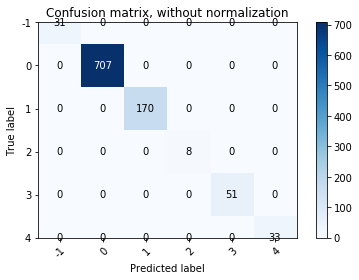

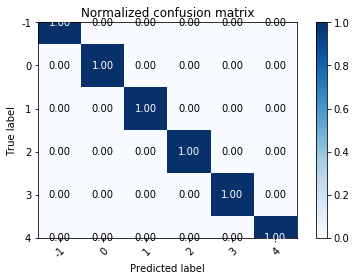

In [42]:
def plot_confusion_matrix(y_true, y_pred, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(truth['class'], preds['predix'], labels=labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(truth['class'], preds['predix'], labels=labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [67]:
tru4_pred4 = truth[(truth['class']==4) & (preds['predix']==4)].sample(1)
filey = tru4_pred4.iloc[0]['clip_title']
judge = tru4_pred4.iloc[0]['labeler']
print(f"Sample clip {filey} was brought to you by {judge}".format())

Sample clip how_to_strike_max_power_slice755.mp4 was brought to you by Ahsen


In [46]:
preds[preds['predix']==4].shape

(33, 1)

[-1] exclude
[0] no punch
[1] violent punch contact
[2] violent punch no-contact
[3] non-violent punch contact
[4] non-violent punch no-contact